In [5]:
%cd M1-S2-Projet/

/Users/Yanis/Desktop/Projet M1 S2/M1-S2-Projet


In [7]:
from src.main import*

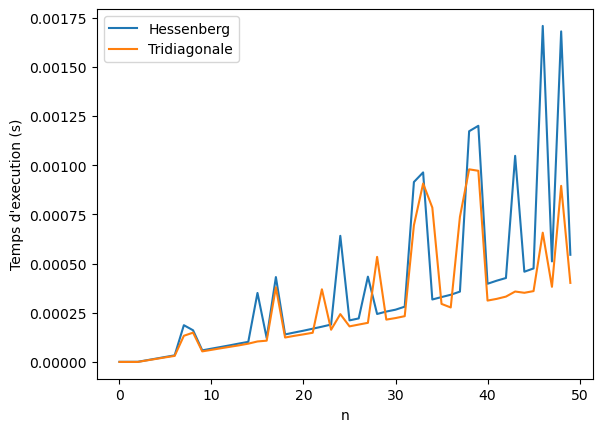

In [9]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

def run_timing_tests(n):
    for i in range(10):
        h=0
        t=0
        np.random.seed(0)
        D = np.diag(np.arange(n))
        P = np.random.uniform(-1,1,(n,n))
        Pinv = np.linalg.inv(P)
        A = P@D@Pinv
        A = (A+A.T)/2
        t1 = timeit.default_timer()
        hessenberg(A.copy())
        t2 = timeit.default_timer()
        h =  (h+t2-t1)/2
    
        t3 = timeit.default_timer()
        tridiagonale(A.copy())
        t4 = timeit.default_timer()
        t = (t+t4-t3)/2

    return h,t

n = 50
H = []
T = []

for i in range(n):
    (h,t) = run_timing_tests(i)
    H.append(h)
    T.append(t)
    

plt.plot(range(n),H,label = "Hessenberg")
plt.plot(range(n),T,label = "Tridiagonale")
plt.xlabel('n')
plt.ylabel("Temps d'execution (s)")
plt.legend()
plt.show()

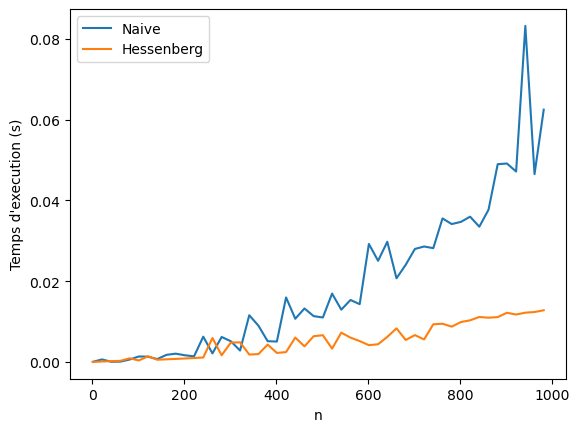

In [49]:
def rend_hessenberg(A):
    n = len(A[0])
    for i in range(n):
        for j in range(i-1):
            A[i,j] = 0
    return A


def qr_step_naive(A,U):
    Q, R = np.linalg.qr(A)
    A_new = R @ Q
    U_new = U @ Q
    return A_new,U_new


#"temps de calcul pour une itération qr en fonction de la taille de la matrice, pour les matrices de Hessenbergs et les matrices quelconque"


def run_timing_tests(n):
    for i in range(10):
        h=0
        t=0
        np.random.seed(0)
        A = np.random.rand(n,n)
        U = np.eye(n)
        t1 = timeit.default_timer()
        qr_step_naive(A,U)
        t2 = timeit.default_timer()
        h =  (h+(t2-t1))/2
        U = np.eye(n)
        t3 = timeit.default_timer()
        hessenberg_qr_step(A,U)
        t4 = timeit.default_timer()
        t = (t+(t4-t3))/2

    return h,t

n = 50
pas = 20
H = []
T = []

for i in range(1,n*pas,pas):
    (h,t) = run_timing_tests(i)
    H.append(h)
    T.append(t)
    
plt.plot(range(1,n*pas,pas),H,label = "Naive")
plt.plot(range(1,n*pas,pas),T,label = "Hessenberg")
plt.xlabel('n')
plt.ylabel("Temps d'execution (s)")
plt.legend()
plt.savefig("Hessenberg naive.pdf")
plt.show()
